In [84]:
import serial
from pypylon import pylon
from ctypes import *

In [87]:
ser = serial.Serial('/dev/ttyUSB1')

In [88]:
ser.isOpen()

True

In [115]:
ser.write(b'0x0000')#70, output - 6
#ser.write(bytes(50))

6

In [114]:
# Create an instant camera object with the camera device found first.
camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())
camera.Open()


camera.GainRaw.Value = 50
camera.ExposureTimeRaw.Value = 1891911
camera.AcquisitionFrameRateAbs.Value = 10


# print('Gain:', camera.GainRaw.GetValue())
# print('Exposure Time:', camera.ExposureTimeRaw.GetValue())
# print('Acquisition Frame Rate Abs:', camera.AcquisitionFrameRateAbs.GetValue())

img = pylon.PylonImage()

converter = pylon.ImageFormatConverter()

# converting to opencv bgr format
converter.OutputPixelFormat = pylon.PixelType_BGR8packed
converter.OutputBitAlignment = pylon.OutputBitAlignment_MsbAligned

camera.StartGrabbing()
# print("done1")

grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)

if grabResult.GrabSucceeded():
    # Access the image data
    image = converter.Convert(grabResult)
    img = image.GetArray()
    #print(img)
    
camera.StopGrabbing()
camera.Close()

print("done")

done


In [109]:
from PIL import Image
from matplotlib import cm
import numpy as np
PIL_image = Image.fromarray(img.astype('uint8'), 'RGB')

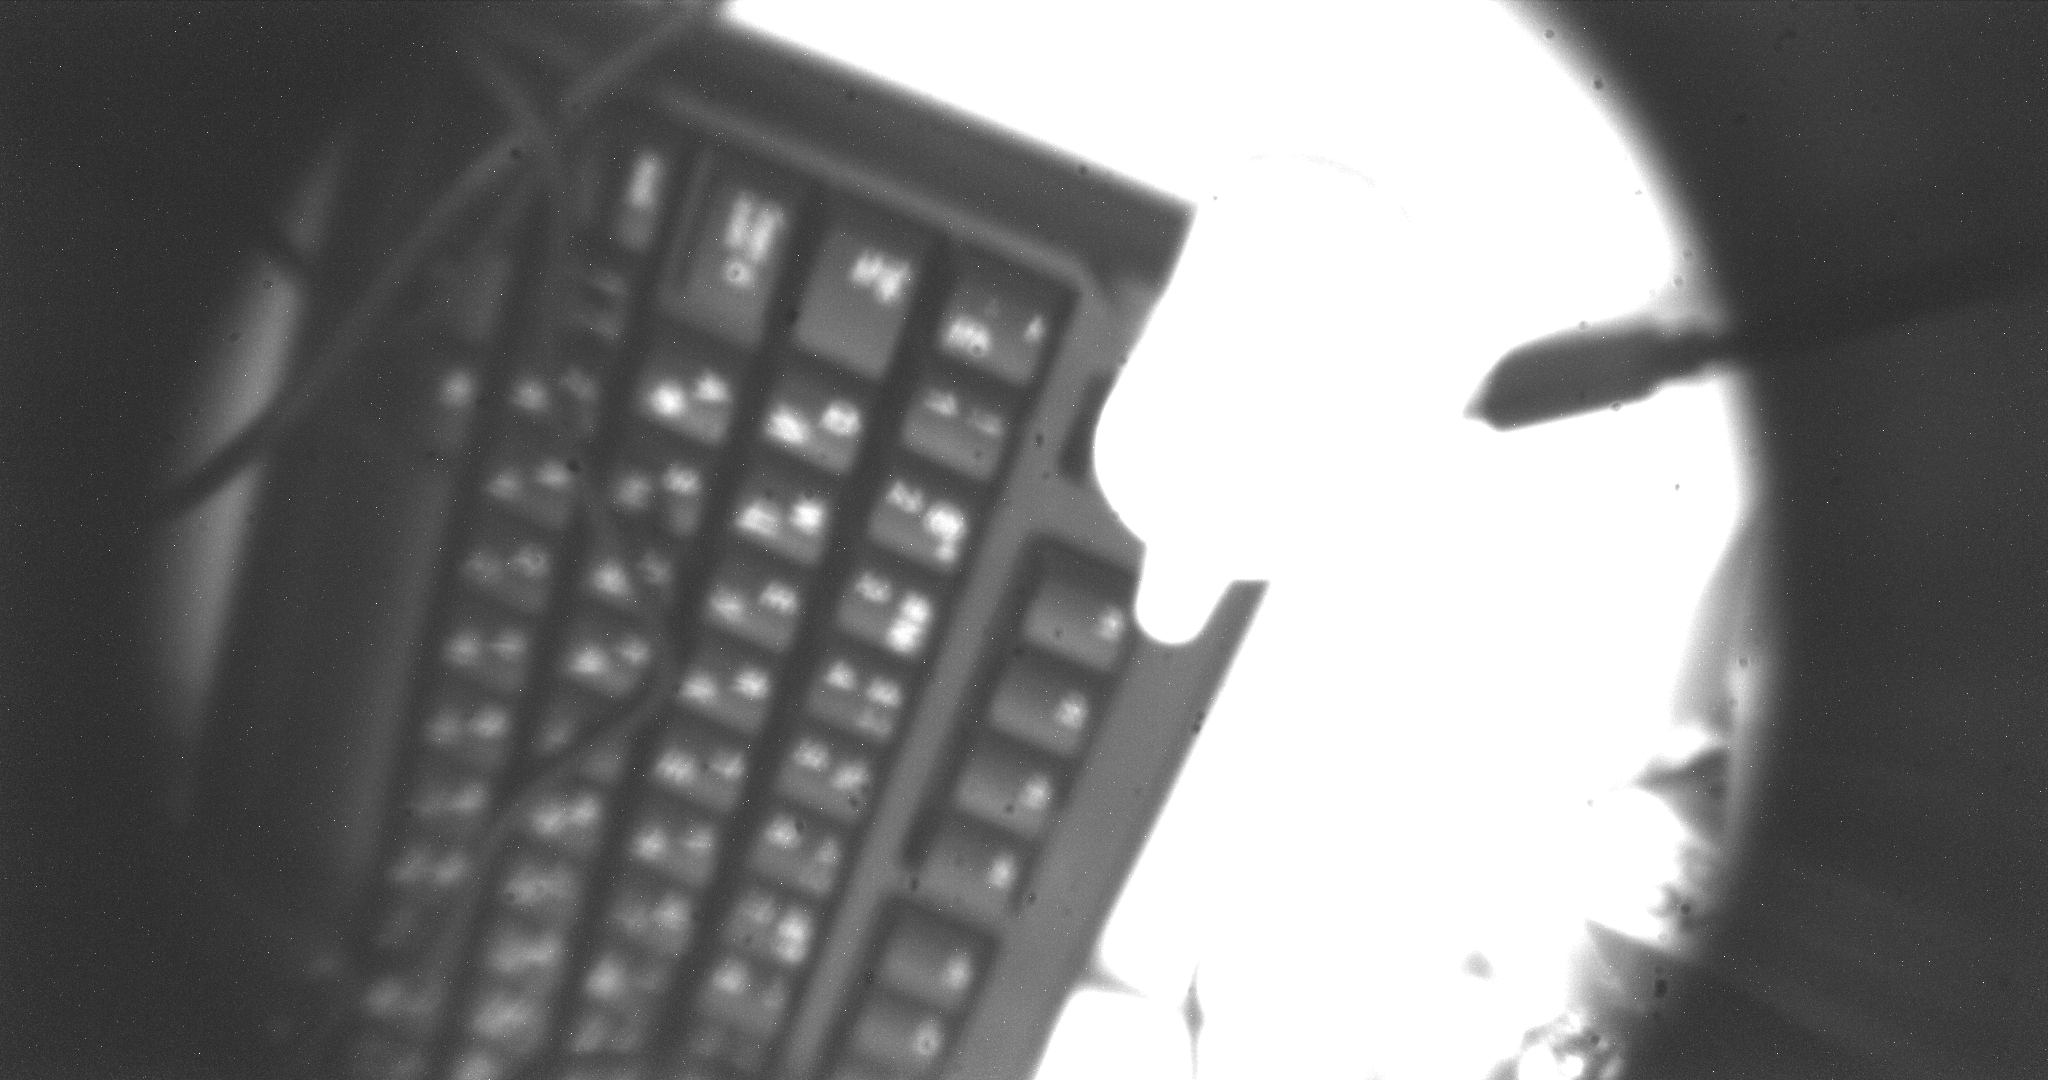

In [110]:
PIL_image 

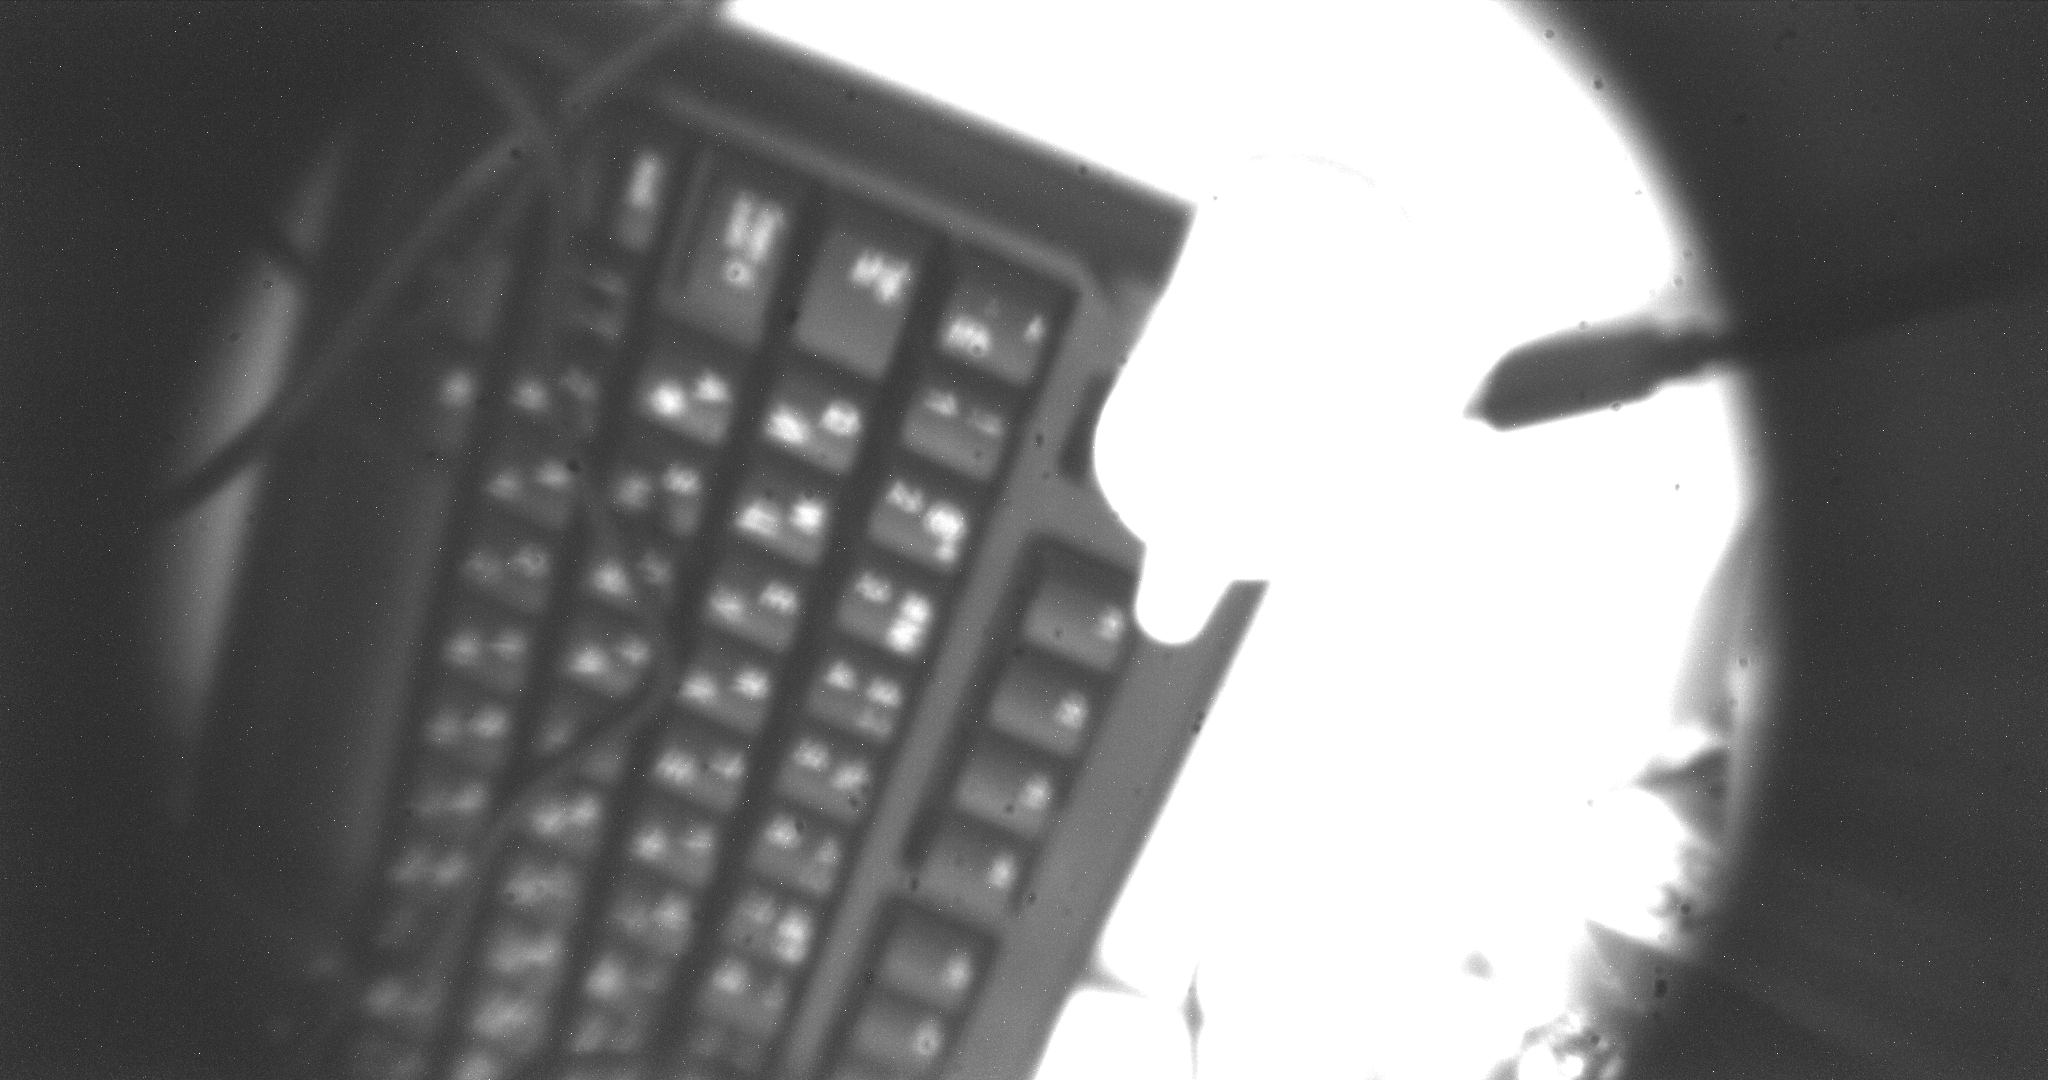

In [111]:
PIL_image

In [4]:
import torch
from PIL import Image

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True, pretrained=True)
# Images
img1 = Image.open('/home/anna/Downloads/cat.jpeg')
# img2 = Image.open('bus.jpg')
# imgs = [img1, img2]  # batched list of images

# Inference
prediction = model(img1, size=640)  # includes NMS

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /home/anna/.cache/torch/hub/master.zip

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Focus                     [3, 32, 3]                    
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  1    156928  models.common.C3                        [128, 128, 3]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  1    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   11

Adding autoShape... 


In [8]:
import cv2
import torch
from PIL import Image

# Model
#model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)  # for file/URI/PIL/cv2/np inputs and NMS

# Images
# for f in ['zidane.jpg', 'bus.jpg']:  # download 2 images
#     print(f'Downloading {f}...')
#     torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/' + f, f)
# img1 = Image.open('zidane.jpg')  # PIL image
# img2 = cv2.imread('bus.jpg')[:, :, ::-1]  # OpenCV image (BGR to RGB)
# imgs = [img1, img2]  # batched list of images

img1 = Image.open('/home/anna/Downloads/cat.jpeg')

# Inference
results = model(img1, size=640)  # includes NMS

# Results
results.print()  # print results to screen
results.show()  # display results
results.save()  # save as results1.jpg, results2.jpg... etc.

# Data
print('\n', results.xyxy[0])  # print img1 predictions
#          x1 (pixels)  y1 (pixels)  x2 (pixels)  y2 (pixels)   confidence        class
# tensor([[7.47613e+02, 4.01168e+01, 1.14978e+03, 7.12016e+02, 8.71210e-01, 0.00000e+00],
#         [1.17464e+02, 1.96875e+02, 1.00145e+03, 7.11802e+02, 8.08795e-01, 0.00000e+00],
#         [4.23969e+02, 4.30401e+02, 5.16833e+02, 7.20000e+02, 7.77376e-01, 2.70000e+01],
#         [9.81310e+02, 3.10712e+02, 1.03111e+03, 4.19273e+02, 2.86850e-01, 2.70000e+01]])

image 1/1: 508x847 1 cat, 1 dog, 1 frisbee, 1 sports ball
Saving results0.jpg, done.

 tensor([[4.58556e+02, 3.28792e+02, 5.55348e+02, 4.22253e+02, 8.67742e-01, 3.20000e+01],
        [2.16716e+02, 2.32119e+01, 5.61876e+02, 4.30247e+02, 5.60414e-01, 1.50000e+01],
        [2.19658e+02, 2.35158e+01, 5.62062e+02, 4.30401e+02, 4.78685e-01, 1.60000e+01],
        [4.60321e+02, 3.26449e+02, 5.56658e+02, 4.24973e+02, 2.52067e-01, 2.90000e+01]])


In [13]:
results.xyxy

[tensor([[4.58556e+02, 3.28792e+02, 5.55348e+02, 4.22253e+02, 8.67742e-01, 3.20000e+01],
         [2.16716e+02, 2.32119e+01, 5.61876e+02, 4.30247e+02, 5.60414e-01, 1.50000e+01],
         [2.19658e+02, 2.35158e+01, 5.62062e+02, 4.30401e+02, 4.78685e-01, 1.60000e+01],
         [4.60321e+02, 3.26449e+02, 5.56658e+02, 4.24973e+02, 2.52067e-01, 2.90000e+01]])]

In [14]:
results.print()

image 1/1: 508x847 1 cat, 1 dog, 1 frisbee, 1 sports ball


In [15]:
img1 = Image.open('/home/anna/Downloads/car.jpeg')

# Inference
results = model(img1, size=640)  # includes NMS

# Results
results.print()  # print results to screen
results.show()  # display results
results.save()

image 1/1: 750x1000 1 car
Saving results0.jpg, done.


In [19]:
img1.size

(1000, 750)

In [20]:
print('\n', results.xyxy[0]) 


 tensor([[1.73861e+02, 3.38779e+02, 8.20297e+02, 6.41323e+02, 8.13263e-01, 2.00000e+00]])


In [22]:
img2 = img1.crop((1.73861e+02, 3.38779e+02, 8.20297e+02, 6.41323e+02))

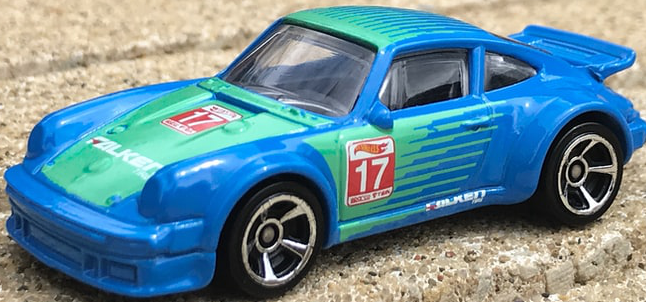

In [23]:
img2